# Boston Housing Study

In this study, we are interested in estimating the mean market value of the residential real estate in Boston area. We will use different modeling methods than recommend the use of one of them.

## Import packages

In [468]:
# Operating system basic packages
import os # operating system
import gc # garbage collector
import random # random seed generator

# basic daraframe, array and math
import pandas as pd  # data frame operations  
import math # math functions
import numpy as np  # arrays and math functions
import matplotlib.pyplot as plt  # static plotting
import seaborn as sns  # pretty plotting, including heat map

# Scikit Learn
import sklearn as sk # scikit learn
from sklearn.utils import resample # sampling
from sklearn.model_selection import train_test_split as tts # train test split
from sklearn.linear_model import LinearRegression, Ridge, Lasso, ElasticNet # lieanr models import
from sklearn.metrics import mean_squared_error, r2_score # metrics import
from math import sqrt  # for root mean-squared error calculation

# suppress warning messages
def warn(*args, **kwargs):
    pass
import warnings
warnings.warn = warn

from sklearn import model_selection # needed models
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import StandardScaler
from sklearn.impute import SimpleImputer # imputer
from sklearn.ensemble import BaggingRegressor as BR # Bagging regression
from sklearn.ensemble import RandomForestRegressor as RFR # Random Forest regression
from sklearn.ensemble import ExtraTreesRegressor as ETR # Random Forest regression
from sklearn.ensemble import GradientBoostingRegressor as BR # Bagging regression
from sklearn.ensemble import BaggingRegressor as BR # Bagging regression
from pandas.plotting import scatter_matrix






# Eploratory Data Anaysis

In [469]:
# read data for the Boston Housing Study
# creating data frame restdata
boston_input = pd.read_csv('boston.csv')

# check the pandas DataFrame object boston_input
print('\nboston DataFrame (first and last five rows):')
print(boston_input.head())
print(boston_input.tail())

print('\nGeneral description of the boston_input DataFrame:')
print(boston_input.info())

# drop neighborhood from the data being considered
boston = boston_input.drop('neighborhood', 1)
print('\nGeneral description of the boston DataFrame:')
print(boston.info())

print('\nDescriptive statistics of the boston DataFrame:')
print(boston.describe())


boston DataFrame (first and last five rows):
  neighborhood     crim    zn  indus  chas    nox  rooms   age     dis  rad  \
0       Nahant  0.00632  18.0   2.31     0  0.538  6.575  65.2  4.0900    1   
1   Swampscott  0.02731   0.0   7.07     0  0.469  6.421  78.9  4.9671    2   
2   Swanpscott  0.02729   0.0   7.07     0  0.469  7.185  61.1  4.9671    2   
3   Marblehead  0.03237   0.0   2.18     0  0.458  6.998  45.8  6.0622    3   
4   Marblehead  0.06905   0.0   2.18     0  0.458  7.147  54.2  6.0622    3   

   tax  ptratio  lstat    mv  
0  296     15.3   4.98  24.0  
1  242     17.8   9.14  21.6  
2  242     17.8   4.03  34.7  
3  222     18.7   2.94  33.4  
4  222     18.7   5.33  36.2  
    neighborhood     crim   zn  indus  chas    nox  rooms   age     dis  rad  \
501     Winthrop  0.06263  0.0  11.93     0  0.573  6.593  69.1  2.4786    1   
502     Winthrop  0.04527  0.0  11.93     0  0.573  6.120  76.7  2.2875    1   
503     Winthrop  0.06076  0.0  11.93     0  0.573  6

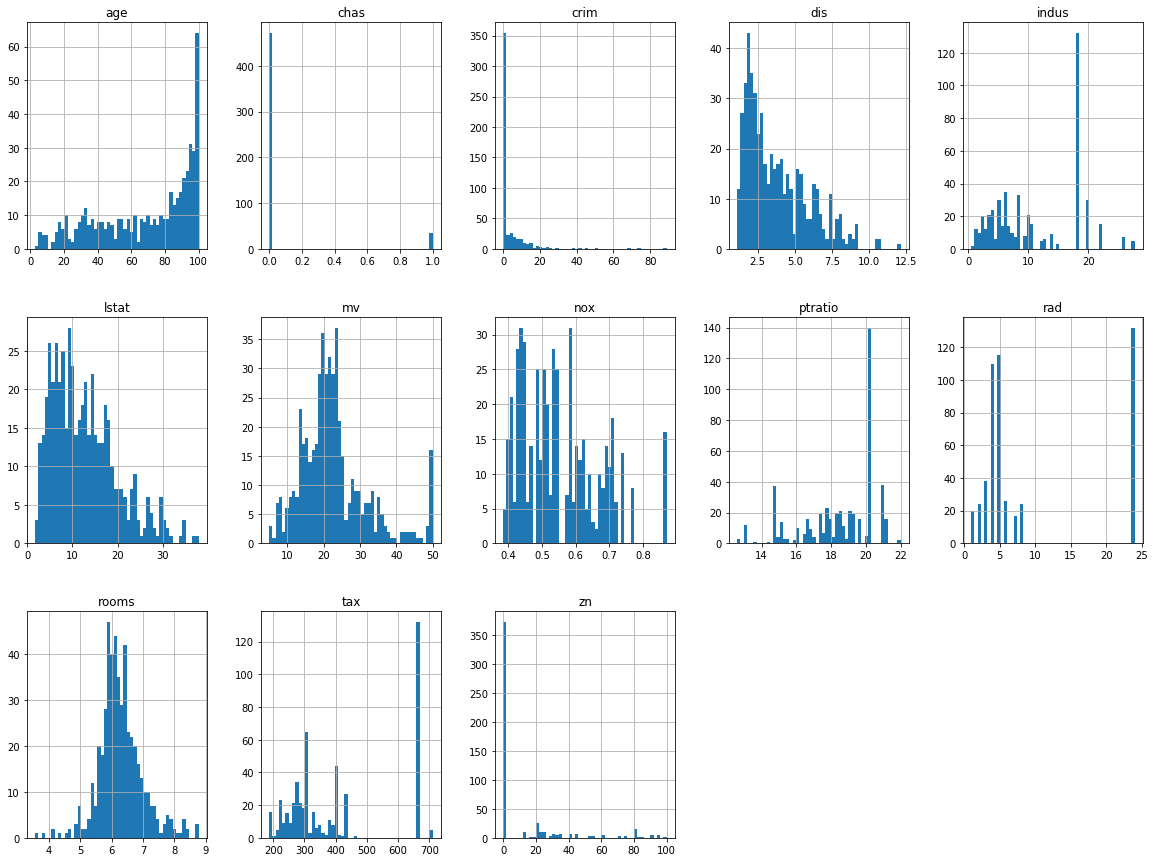

In [470]:
# histograms for variables in boston housing data set
#fig, axis = plt.subplots()
hist = boston_input.hist(layout=(3,5), bins=50, figsize=(20,15))
#plt.savefig('Histogram software pref.pdf',
#            bbox_inches = 'tight', dpi=None, facecolor='w', edgecolor='b', 
#            orientation='portrait', papertype=None, format=None, 
#            transparent=True, pad_inches=0.25, frameon=None) 

In [471]:

corr_matrix = boston_input.corr()
corr_matrix["mv"].sort_values(ascending=False)

mv         1.000000
rooms      0.696304
zn         0.360386
dis        0.249315
chas       0.175663
age       -0.377999
rad       -0.384766
crim      -0.389582
nox       -0.429300
tax       -0.471979
indus     -0.484754
ptratio   -0.505655
lstat     -0.740836
Name: mv, dtype: float64

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x1a5b49a7d0>,
      dtype=object)

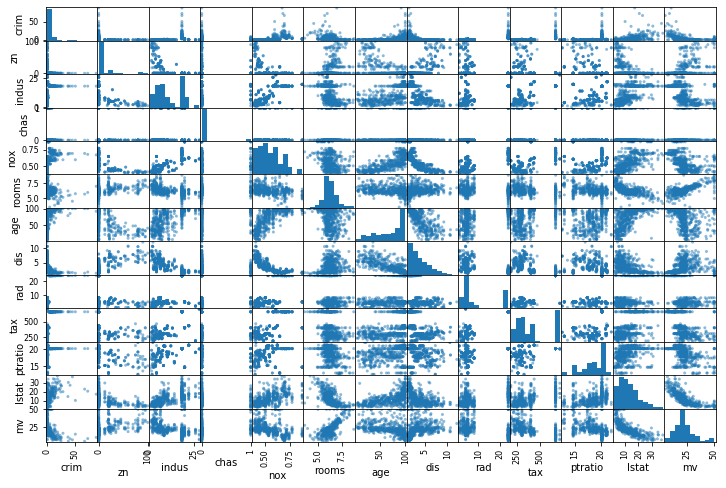

In [472]:

scatter_matrix(boston_input, figsize=(12, 8))


<Figure size 432x288 with 0 Axes>

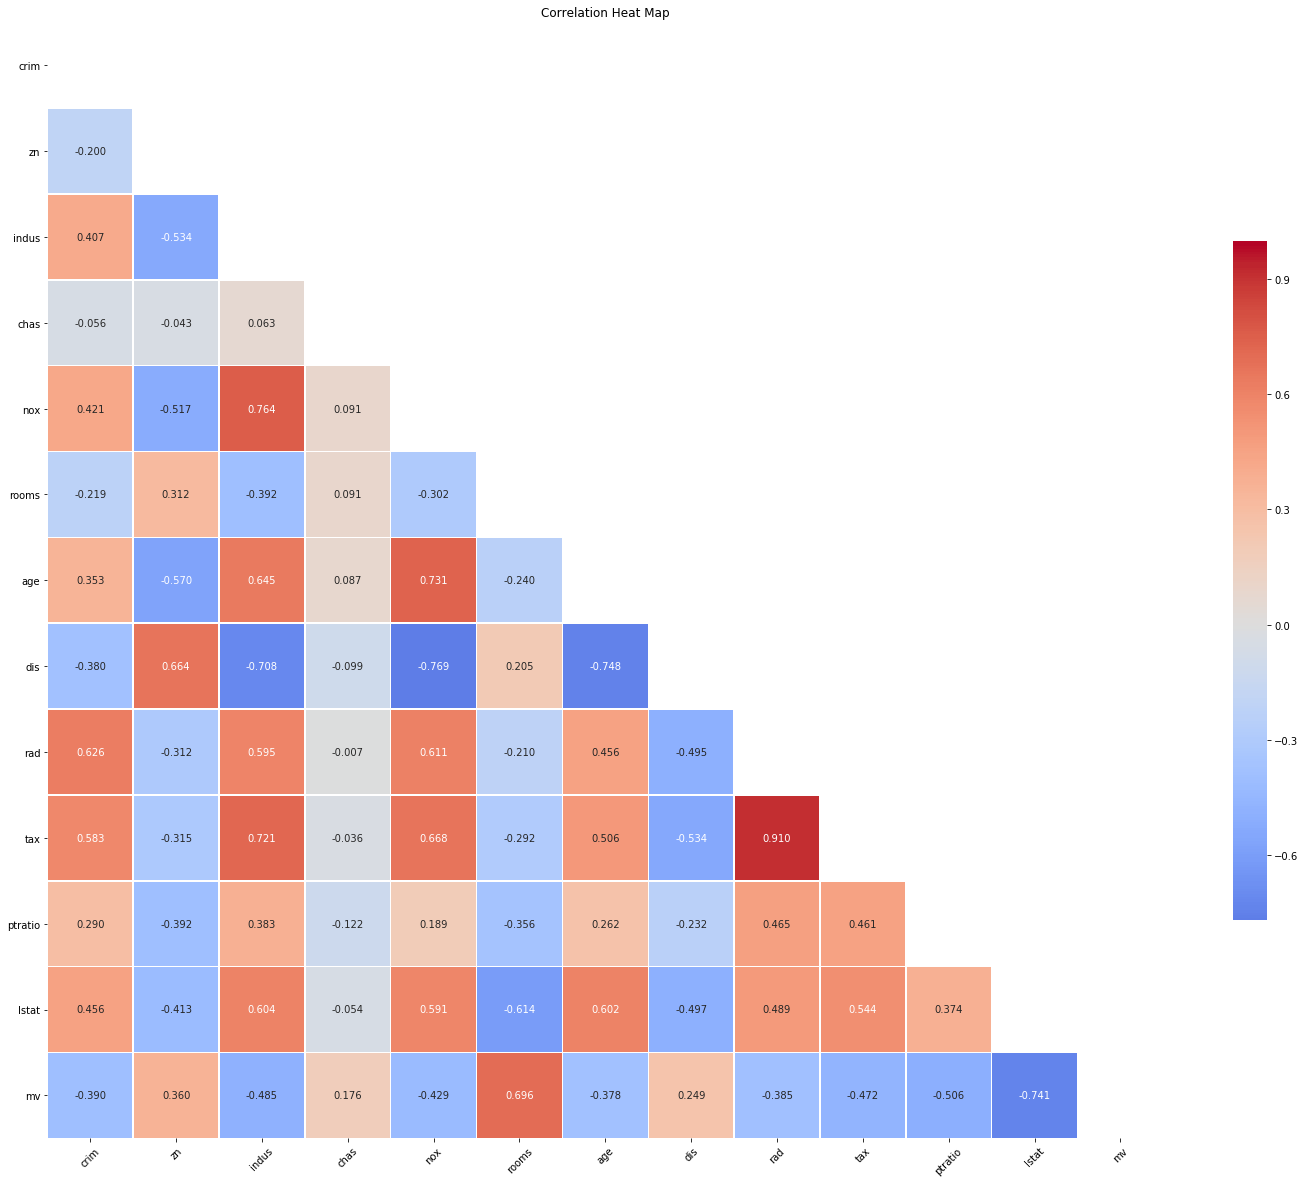

In [473]:

# correlation heat map setup for seaborn
def corr_chart(df_corr):
    corr=df_corr.corr()
    #screen top half to get a triangle
    top = np.zeros_like(corr, dtype=np.bool)
    top[np.triu_indices_from(top)] = True
    fig=plt.figure()
    fig, ax = plt.subplots(figsize=(25,25))
    sns.heatmap(corr, mask=top, cmap='coolwarm', 
        center = 0, square=True, 
        linewidths=.5, cbar_kws={'shrink':.5}, 
        annot = True, annot_kws={'size': 10}, fmt = '.3f')           
    plt.xticks(rotation=45) # rotate variable labels on columns (x axis)
    plt.yticks(rotation=0) # use horizontal variable labels on rows (y axis)
    plt.title('Correlation Heat Map')   
    bottom, top = ax.get_ylim()
    ax.set_ylim(bottom + 0.5, top - 0.5)

np.set_printoptions(precision=3)

corr_chart(df_corr = boston_input)

# Scaling and Outliers

In [474]:
#read data again
# creating data frame restdata
bostonw_df = pd.read_csv('boston.csv')
# drop neighborhood from the data being considered
boston_df = bostonw_df.drop('neighborhood', 1)
#boston_df = boston_df.drop('tax', 1)

#caler = MinMaxScaler()
scaler = StandardScaler()
boston_col = boston_df.columns
bostonscl_df = scaler.fit_transform(boston_df)
bostonscl_df = pd.DataFrame(bostonscl_df, columns = boston_col)
bostonscl_df.describe()




,crim,zn,indus,chas,nox,rooms,age,dis,rad,tax,ptratio,lstat,mv
count,5.060000e+02,5.060000e+02,5.060000e+02,5.060000e+02,5.060000e+02,5.060000e+02,5.060000e+02,5.060000e+02,5.060000e+02,5.060000e+02,5.060000e+02,5.060000e+02,5.060000e+02
mean,-8.688702e-17,3.306534e-16,2.804081e-16,-3.100287e-16,-8.071058e-16,-5.978968e-17,-2.650493e-16,8.293761e-17,1.514379e-15,-9.934960e-16,4.493551e-16,-1.595123e-16,-3.962575e-16
std,1.000990e+00,1.000990e+00,1.000990e+00,1.000990e+00,1.000990e+00,1.000990e+00,1.000990e+00,1.000990e+00,1.000990e+00,1.000990e+00,1.000990e+00,1.000990e+00,1.000990e+00
min,-4.197819e-01,-4.877224e-01,-1.557842e+00,-2.725986e-01,-1.465882e+00,-3.880249e+00,-2.335437e+00,-1.267069e+00,-9.828429e-01,-1.313990e+00,-2.707379e+00,-1.531127e+00,-1.910898e+00
25%,-4.109696e-01,-4.877224e-01,-8.676906e-01,-2.725986e-01,-9.130288e-01,-5.686303e-01,-8.374480e-01,-8.056878e-01,-6.379618e-01,-7.675760e-01,-4.880391e-01,-7.994200e-01,-5.999994e-01
50%,-3.906665e-01,-4.877224e-01,-2.110985e-01,-2.725986e-01,-1.442174e-01,-1.084655e-01,3.173816e-01,-2.793234e-01,-5.230014e-01,-4.646726e-01,2.748590e-01,-1.812536e-01,-1.448642e-01
75%,7.396560e-03,4.877224e-02,1.015999e+00,-2.725986e-01,5.986790e-01,4.827678e-01,9.067981e-01,6.623709e-01,1.661245e+00,1.530926e+00,8.065758e-01,6.030188e-01,2.693906e-01
max,9.933931e+00,3.804234e+00,2.422565e+00,3.668398e+00,2.732346e+00,3.555044e+00,1.117494e+00,3.960518e+00,1.661245e+00,1.798194e+00,1.638828e+00,3.548771e+00,2.994751e+00


In [475]:
bostonscl_df.head()

,crim,zn,indus,chas,nox,rooms,age,dis,rad,tax,ptratio,lstat,mv
0,-0.419782,0.284830,-1.287909,-0.272599,-0.144217,0.413672,-0.120013,0.140214,-0.982843,-0.666608,-1.459000,-1.075562,0.160376
1,-0.417339,-0.487722,-0.593381,-0.272599,-0.740262,0.194274,0.367166,0.557160,-0.867883,-0.987329,-0.303094,-0.492439,-0.101258
2,-0.417342,-0.487722,-0.593381,-0.272599,-0.740262,1.282714,-0.265812,0.557160,-0.867883,-0.987329,-0.303094,-1.208727,1.326830
3,-0.416750,-0.487722,-1.306878,-0.272599,-0.835284,1.016303,-0.809889,1.077737,-0.752922,-1.106115,0.113032,-1.361517,1.185112
4,-0.412482,-0.487722,-1.306878,-0.272599,-0.835284,1.228577,-0.511180,1.077737,-0.752922,-1.106115,0.113032,-1.026501,1.490352


<Figure size 432x288 with 0 Axes>

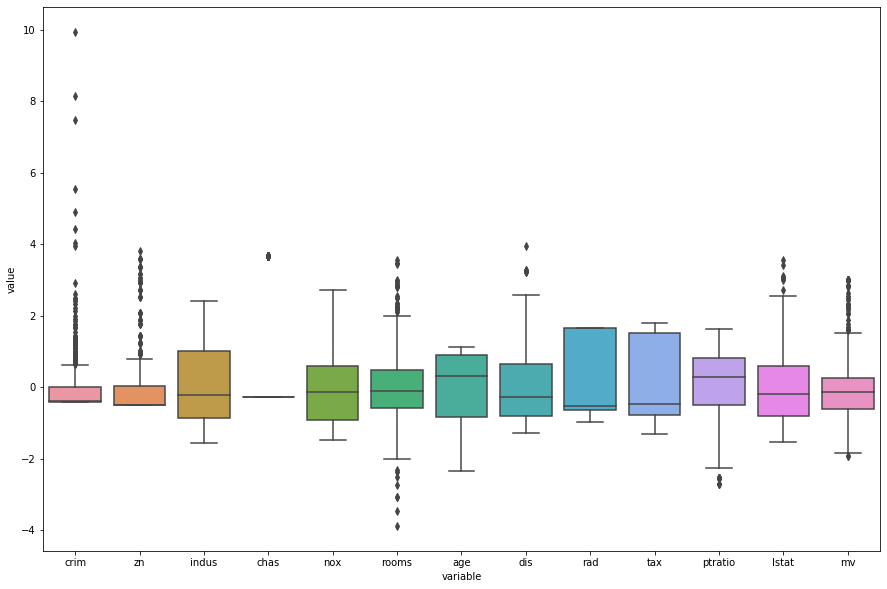

In [476]:
fig=plt.figure()
fig, ax = plt.subplots(figsize=(15,10))
sns.boxplot(x="variable", y="value", data=pd.melt(bostonscl_df))

# Make Positive Definite

In [477]:
# data values
boston_val = bostonscl_df.values

# columns name 
boston_col = bostonscl_df.columns



In [478]:
boston_col_n = np.ma.size(bostonscl_df, 0)

for i in range(0,boston_col_n):
    boston_val[:,i]+=np.abs(min(boston_val[:,i]))+0.1

boston_df=pd.DataFrame(boston_val, columns=boston_col)

## Missing Data

In [509]:
df = boston_df.notnull()

# Perform equality comparison on the entire DataFrame:

df[df.eq(False).any(1)]

,crim,zn,indus,chas,nox,rooms,age,dis,rad,tax,ptratio,lstat,mv


## Spilt the data

In [480]:
y = boston_df.loc[:, 'mv']
x = boston_df.loc[:,'crim':'lstat']


In [481]:
x.head()

,crim,zn,indus,chas,nox,rooms,age,dis,rad,tax,ptratio,lstat
0,0.100000,0.872552,0.369932,0.1,1.421664,4.393921,2.315424,1.507283,0.100000,0.747382,1.348379,0.555565
1,0.102443,0.100000,1.064461,0.1,0.825620,4.174524,2.802603,1.924229,0.214960,0.426661,2.504285,1.138688
2,0.102440,0.100000,1.064461,0.1,0.825620,5.262963,2.169625,1.924229,0.214960,0.426661,2.504285,0.422400
3,0.103032,0.100000,0.350964,0.1,0.730598,4.996552,1.625549,2.444806,0.329921,0.307875,2.920411,0.269610
4,0.107300,0.100000,0.350964,0.1,0.730598,5.208826,1.924257,2.444806,0.329921,0.307875,2.920411,0.604626


In [482]:
y.head()

0    2.171274
1    1.909639
2    3.337728
3    3.196010
4    3.501250
Name: mv, dtype: float64

In [483]:
x_train, x_test, y_train, y_test = tts(x, y, test_size = .20, random_state = 1234)

In [484]:
x_test.head()

,crim,zn,indus,chas,nox,rooms,age,dis,rad,tax,ptratio,lstat
64,0.101535,0.851092,0.234237,0.1,0.368652,5.147566,2.112728,3.947305,0.329921,0.272239,2.874175,0.985898
100,0.116565,0.100000,1.281866,0.1,1.266175,4.610469,2.838164,0.883503,0.559841,1.270039,3.937609,1.177936
400,3.013960,0.100000,2.673841,0.1,2.760606,3.556222,3.552932,0.318290,2.744088,2.944917,3.613955,3.609952
485,0.526781,0.100000,2.673841,0.1,1.810389,4.019236,1.842468,1.460554,2.744088,2.944917,3.613955,1.340538
454,1.206396,0.100000,2.673841,0.1,2.933372,4.611894,3.343124,0.749592,2.744088,2.944917,3.613955,2.480151


# Models creation and testing.

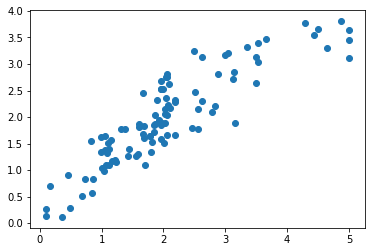

Coef (a):[-0.119  0.156  0.025  0.087 -0.27   0.207 -0.002 -0.408  0.306 -0.266
 -0.232 -0.436]
Intercept(b):3.4632183749396166
Training set score: 0.72
Test set score: 0.77
Mean Square Error: 0.28
Root Mean-Square Error: 0.52


In [495]:

#using sklearn LinearRegression, create test model:

model_to_fit = LinearRegression(fit_intercept = True).fit(x_train, y_train)

fitted_model = model_to_fit.fit(x_train, y_train)

y_pred = fitted_model.predict(x_test)
plt.scatter(y_test, y_pred);
plt.show()

#print coeficients, intercept, Training & Test scores: 
print("Coef (a):{}".format(fitted_model.coef_))
print("Intercept(b):{}".format(fitted_model.intercept_))
print("Training set score: {:.2f}".format(fitted_model.score(x_train, y_train)))
print("Test set score: {:.2f}".format(fitted_model.score(x_test, y_test)))

print("Mean Square Error: {:.2f}".format(mean_squared_error(y_test, y_pred)))
print("Root Mean-Square Error: {:.2f}".format(np.sqrt(mean_squared_error(y_test, y_pred))))


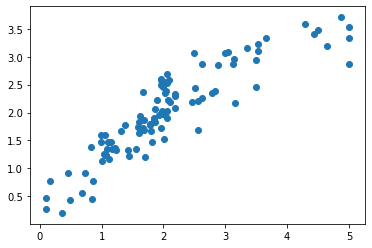

Coef (a):[-0.084  0.097 -0.035  0.092 -0.147  0.243 -0.018 -0.245  0.098 -0.093
 -0.191 -0.369]
Intercept(b):2.817215160456137
Training set score: 0.70
Test set score: 0.78
Mean Square Error: 0.27
Root Mean-Square Error: 0.52


In [496]:

#using sklearn Ridge, create test model:
RANDOM_SEED = 1234

model_to_fit = Ridge(alpha = 50, solver = 'cholesky',
                fit_intercept = True,
                normalize = False,
                random_state = RANDOM_SEED)

fitted_model = model_to_fit.fit(x_train, y_train)

y_pred = fitted_model.predict(x_test)
plt.scatter(y_test, y_pred);
plt.show()

#print coeficients, intercept, Training & Test scores: 
print("Coef (a):{}".format(fitted_model.coef_))
print("Intercept(b):{}".format(fitted_model.intercept_))
print("Training set score: {:.2f}".format(fitted_model.score(x_train, y_train)))
print("Test set score: {:.2f}".format(fitted_model.score(x_test, y_test)))

print("Mean Square Error: {:.2f}".format(mean_squared_error(y_test, y_pred)))
print("Root Mean-Square Error: {:.2f}".format(np.sqrt(mean_squared_error(y_test, y_pred))))


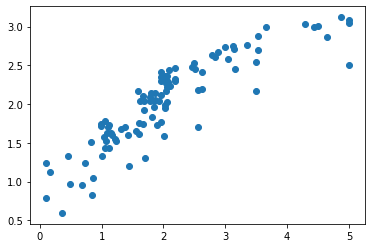

Coef (a):[-0.     0.    -0.     0.    -0.     0.178 -0.     0.    -0.    -0.
 -0.089 -0.374]
Intercept(b):2.15823917438397
Training set score: 0.58
Test set score: 0.64
Mean Square Error: 0.44
Root Mean-Square Error: 0.66


In [497]:

#using sklearn Lasso, create test model:
RANDOM_SEED = 1234

model_to_fit = Lasso(alpha = 0.2, max_iter=10000, tol=0.01, fit_intercept=True, normalize=False, random_state=RANDOM_SEED)

#model_to_fit = Lasso(alpha = 0.1, max_iter=10000, tol=0.01, fit_intercept=True, normalize=False, random_state=RANDOM_SEED)

fitted_model = model_to_fit.fit(x_train, y_train)

y_pred = fitted_model.predict(x_test)
plt.scatter(y_test, y_pred)
plt.show()

#print coeficients, intercept, Training & Test scores: 
print("Coef (a):{}".format(fitted_model.coef_))
print("Intercept(b):{}".format(fitted_model.intercept_))
print("Training set score: {:.2f}".format(fitted_model.score(x_train, y_train)))
print("Test set score: {:.2f}".format(fitted_model.score(x_test, y_test)))

print("Mean Square Error: {:.2f}".format(mean_squared_error(y_test, y_pred)))
print("Root Mean-Square Error: {:.2f}".format(np.sqrt(mean_squared_error(y_test, y_pred))))


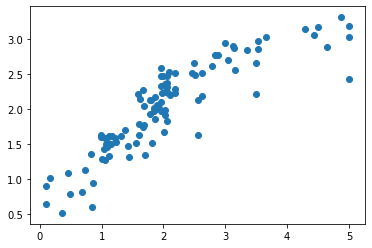

Coef (a):[-0.034  0.03  -0.026  0.056 -0.038  0.22  -0.    -0.003 -0.    -0.041
 -0.136 -0.273]
Intercept(b):2.10044022051437
Training set score: 0.62
Test set score: 0.68
Mean Square Error: 0.39
Root Mean-Square Error: 0.62


In [498]:

#using sklearn ElasticNet, create test model:
RANDOM_SEED = 1234

model_to_fit = ElasticNet(alpha = 0.5, 
                          l1_ratio=0.1, 
                          max_iter =10000,
                          tol=0.01, 
                          fit_intercept = True, 
                          normalize = False, 
                          random_state = RANDOM_SEED)
                
fitted_model = model_to_fit.fit(x_train, y_train)

y_pred = fitted_model.predict(x_test)
plt.scatter(y_test, y_pred);
plt.show()

#print coeficients, intercept, Training & Test scores: 
print("Coef (a):{}".format(fitted_model.coef_))
print("Intercept(b):{}".format(fitted_model.intercept_))
print("Training set score: {:.2f}".format(fitted_model.score(x_train, y_train)))
print("Test set score: {:.2f}".format(fitted_model.score(x_test, y_test)))

print("Mean Square Error: {:.2f}".format(mean_squared_error(y_test, y_pred)))
print("Root Mean-Square Error: {:.2f}".format(np.sqrt(mean_squared_error(y_test, y_pred))))



# K-Fold Cross Validation

In [499]:
# set up preliminary data for data for fitting the models 
# the first column is the median housing value response
# the remaining columns are the explanatory variables
prelim_model_data = np.array([boston_df.mv,\
    boston_df.crim,\
    boston_df.zn,\
    boston_df.indus,\
    boston_df.chas,\
    boston_df.nox,\
    boston_df.rooms,\
    boston_df.age,\
    boston_df.dis,\
    boston_df.rad,\
    boston_df.tax,\
    boston_df.ptratio,\
    boston_df.lstat]).T

# standard scores for the columns... along axis 0
scaler = StandardScaler()

    
# the model data will be standardized form of preliminary model data
model_data = scaler.fit_transform(prelim_model_data)


In [500]:
SET_FIT_INTERCEPT=True
RANDOM_SEED=1234
# --------------------------------------------------------
# specify the set of regression models being evaluated
# we set normalize=False because we have standardized
# the model input data outside of the modeling method calls

# list of regression model names
names = ['ElasticNet_Regression', 'Lasso_Regression','Linear_Regression', 
         'Ridge_Regression'] 

# list of regressors
regressors = [ElasticNet(alpha = 0.5, l1_ratio = 0.1, 
                          max_iter=10000, tol=0.01, 
                          fit_intercept = SET_FIT_INTERCEPT, 
                          normalize = False, 
                          random_state = RANDOM_SEED),
              Lasso(alpha = 0.2, max_iter=10000, tol=0.01, 
                     fit_intercept = SET_FIT_INTERCEPT,
                     normalize=False,
                     random_state = RANDOM_SEED),
              LinearRegression(fit_intercept = SET_FIT_INTERCEPT),
              Ridge(alpha = 50, solver = 'cholesky', 
                     fit_intercept = SET_FIT_INTERCEPT, 
                     normalize = False, 
                     random_state = RANDOM_SEED)]

# --------------------------------------------------------
# specify the k-fold cross-validation design
from sklearn.model_selection import KFold

# ten-fold cross-validation employed here
# As an alternative to 10-fold cross-validation, restdata with its 
# small sample size could be analyzed would be a good candidate
# for  leave-one-out cross-validation, which would set the number
# of folds to the number of observations in the data set.
N_FOLDS = 10

# set up numpy array for storing results
cv_results = np.zeros((N_FOLDS, len(names)))

kf = KFold(n_splits = N_FOLDS, shuffle=False, random_state = RANDOM_SEED)
# check the splitting process by looking at fold observation counts

index_for_fold = 0  # fold count initialized 
for train_index, test_index in kf.split(model_data):
    print('\nFold index:', index_for_fold,
          '------------------------------------------')
#   the structure of modeling data for this study has the
#   response variable coming first and explanatory variables later          
#   so 1:model_data.shape[1] slices for explanatory variables
#   and 0 is the index for the response variable    
    X_train = model_data[train_index, 1:model_data.shape[1]]
    X_test = model_data[test_index, 1:model_data.shape[1]]
    y_train = model_data[train_index, 0]
    y_test = model_data[test_index, 0]   
    print('\nShape of input data for this fold:',
          '\nData Set: (Observations, Variables)')
    print('X_train:', X_train.shape)
    print('X_test:',X_test.shape)
    print('y_train:', y_train.shape)
    print('y_test:',y_test.shape)

    index_for_method = 0  # initialize
    for name, reg_model in zip(names, regressors):
        print('\nRegression model evaluation for:', name)
        print('  Scikit Learn method:', reg_model)
        reg_model.fit(X_train, y_train)  # fit on the train set for this fold
        print('Fitted regression intercept:', reg_model.intercept_)
        print('Fitted regression coefficients:', reg_model.coef_)
 
        # evaluate on the test set for this fold
        y_test_predict = reg_model.predict(X_test)
        print('Coefficient of determination (R-squared):',
              r2_score(y_test, y_test_predict))
        fold_method_result = sqrt(mean_squared_error(y_test, y_test_predict))
        print(reg_model.get_params(deep=True))
        print('Root mean-squared error:', fold_method_result)
        cv_results[index_for_fold, index_for_method] = fold_method_result
        index_for_method += 1
  
    index_for_fold += 1

cv_results_df = pd.DataFrame(cv_results)
cv_results_df.columns = names

print('\n----------------------------------------------')
print('Average results from ', N_FOLDS, '-fold cross-validation\n',
      'in standardized units (mean 0, standard deviation 1)\n',
      '\nMethod               Root mean-squared error', sep = '')     
print(cv_results_df.mean())   


Fold index: 0 ------------------------------------------

Shape of input data for this fold: 
Data Set: (Observations, Variables)
X_train: (455, 12)
X_test: (51, 12)
y_train: (455,)
y_test: (51,)

Regression model evaluation for: ElasticNet_Regression
  Scikit Learn method: ElasticNet(alpha=0.5, copy_X=True, fit_intercept=True, l1_ratio=0.1,
           max_iter=10000, normalize=False, positive=False, precompute=False,
           random_state=1234, selection='cyclic', tol=0.01, warm_start=False)
Fitted regression intercept: 0.02081612342380277
Fitted regression coefficients: [-0.051  0.002 -0.039  0.049 -0.035  0.261 -0.    -0.012 -0.    -0.055
 -0.139 -0.267]
Coefficient of determination (R-squared): 0.6519707976134554
{'alpha': 0.5, 'copy_X': True, 'fit_intercept': True, 'l1_ratio': 0.1, 'max_iter': 10000, 'normalize': False, 'positive': False, 'precompute': False, 'random_state': 1234, 'selection': 'cyclic', 'tol': 0.01, 'warm_start': False}
Root mean-squared error: 0.37492281235802

In [501]:
# set up preliminary data for data for fitting the models 
# the first column is the median housing value response
# the remaining columns are the explanatory variables
prelim_model_data = np.array([np.log(boston_df.mv),\
    boston_df.crim,\
    boston_df.zn,\
    boston_df.indus,\
    boston_df.chas,\
    boston_df.nox,\
    boston_df.rooms,\
    boston_df.age,\
    boston_df.dis,\
    boston_df.rad,\
    boston_df.tax,\
    boston_df.ptratio,\
    boston_df.lstat]).T

# standard scores for the columns... along axis 0
scaler = StandardScaler()
    
# the model data will be standardized form of preliminary model data
model_data = scaler.fit_transform(prelim_model_data)

In [1]:
SET_FIT_INTERCEPT=True
RANDOM_SEED=1234
# --------------------------------------------------------
# specify the set of regression models being evaluated
# we set normalize=False because we have standardized
# the model input data outside of the modeling method calls

# list of regression model names
names = ['ElasticNet_Regression', 'Lasso_Regression','Linear_Regression', 
         'Ridge_Regression'] 

# list of regressors
regressors = [ElasticNet(alpha = 0.5, l1_ratio = 0.1, 
                          max_iter=10000, tol=0.01, 
                          fit_intercept = SET_FIT_INTERCEPT, 
                          normalize = False, 
                          random_state = RANDOM_SEED),
              Lasso(alpha = 0.2, max_iter=10000, tol=0.01, 
                     fit_intercept = SET_FIT_INTERCEPT,
                     normalize=False,
                     random_state = RANDOM_SEED),
              LinearRegression(fit_intercept = SET_FIT_INTERCEPT),
              Ridge(alpha = 50, solver = 'cholesky', 
                     fit_intercept = SET_FIT_INTERCEPT, 
                     normalize = False, 
                     random_state = RANDOM_SEED)]

# --------------------------------------------------------
# specify the k-fold cross-validation design
from sklearn.model_selection import KFold

# ten-fold cross-validation employed here
# As an alternative to 10-fold cross-validation, restdata with its 
# small sample size could be analyzed would be a good candidate
# for  leave-one-out cross-validation, which would set the number
# of folds to the number of observations in the data set.
N_FOLDS = 10

# set up numpy array for storing results
cv_results = np.zeros((N_FOLDS, len(names)))

kf = KFold(n_splits = N_FOLDS, shuffle=False, random_state = RANDOM_SEED)
# check the splitting process by looking at fold observation counts
index_for_fold = 0  # fold count initialized 
for train_index, test_index in kf.split(model_data):
    print('\nFold index:', index_for_fold,
          '------------------------------------------')
#   the structure of modeling data for this study has the
#   response variable coming first and explanatory variables later          
#   so 1:model_data.shape[1] slices for explanatory variables
#   and 0 is the index for the response variable    
    X_train = model_data[train_index, 1:model_data.shape[1]]
    X_test = model_data[test_index, 1:model_data.shape[1]]
    y_train = model_data[train_index, 0]
    y_test = model_data[test_index, 0]   
    print('\nShape of input data for this fold:',
          '\nData Set: (Observations, Variables)')
    print('X_train:', X_train.shape)
    print('X_test:',X_test.shape)
    print('y_train:', y_train.shape)
    print('y_test:',y_test.shape)

    index_for_method = 0  # initialize
    for name, reg_model in zip(names, regressors):
        print('\nRegression model evaluation for:', name)
        print('  Scikit Learn method:', reg_model)
        reg_model.fit(X_train, y_train)  # fit on the train set for this fold
        print('Fitted regression intercept:', reg_model.intercept_)
        print('Fitted regression coefficients:', reg_model.coef_)
 
        # evaluate on the test set for this fold
        y_test_predict = reg_model.predict(X_test)
        print('Coefficient of determination (R-squared):',
              r2_score(y_test, y_test_predict))
        fold_method_result = sqrt(mean_squared_error(y_test, y_test_predict))
        print(reg_model.get_params(deep=True))
        print('Root mean-squared error:', fold_method_result)
        cv_results[index_for_fold, index_for_method] = fold_method_result
        index_for_method += 1
  

    index_for_fold += 1

cv_results_df = pd.DataFrame(cv_results)
cv_results_df.columns = names

print('\n----------------------------------------------')
print('Average results from ', N_FOLDS, '-fold cross-validation\n',
      'in standardized units (mean 0, standard deviation 1)\n',
      '\nMethod               Root mean-squared error', sep = '')     
print(cv_results_df.mean())   

NameError: name 'ElasticNet' is not defined

# Conclusions